In [11]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
from scipy.stats import norm
from os import path
import re

import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("paper")

import matplotlib
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
matplotlib.rc('mathtext',**{'default':'regular'})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:
from numpy import genfromtxt

def linear_calib(x):
    """Linear calibration for channels form PHA to energies in MeV"""
    return (-0.02942735 + 0.4521013 *x)*10**6

def from_pha_data(filename):
    """
    Exports data from Pulse Height analyzer. Note only channel 0 is active.
    Returned channels have been linearly calibrated.
    """
    
    col0 = genfromtxt(filename, delimiter=',', skip_header=1, usecols=(0))
    col1 = genfromtxt(filename, delimiter=',', skip_header=1, usecols=(1))

    col1 = linear_calib(col1)
    
    # for safe measure
    col0 = col0[~np.isnan(col0)]
    col1 = col1[~np.isnan(col1)]
    return col0, col1

In [30]:
def power_model(volts, a, b):
    return b*volts**a

high_volts, peak_ch = from_pha_data("8-2_power_law.csv")
print(high_volts)
print(peak_ch)
print(high_volts[:-6])

[400. 420. 440. 460. 480. 500. 520. 540. 560. 580. 600. 620. 630. 640.
 660. 680. 700. 720. 740. 760. 780. 800.]
[ -29427.35        60132.1091248  104260.3607139  166159.3581021
  251148.9772865  368589.5235823  506118.286941   708768.173653
  963075.154903  1309217.473222  1746440.119439  2328873.182203
 2645787.151477  2931307.206479  3421375.973653  3752504.007799
 4070389.994868  4197543.485493  4250525.23684   4237278.66875
 4245226.609604  4242577.295986 ]
[400. 420. 440. 460. 480. 500. 520. 540. 560. 580. 600. 620. 630. 640.
 660. 680.]


In [31]:
par, cov = fitter.curve_fit(power_model, high_volts[:-6], peak_ch[:-6], maxfev = 1000)
volts = np.linspace(high_volts[0], high_volts[-1], 100)
powers = power_model(volts, *par)

print(*par, *np.sqrt(np.diag(cov)))

# overall gain from \delta = 55
print(power_model(55, *par))

6.978514917373058 7.0250250513979e-14 0.36374396426703387 1.6523007075522912e-13
0.09812843386993693


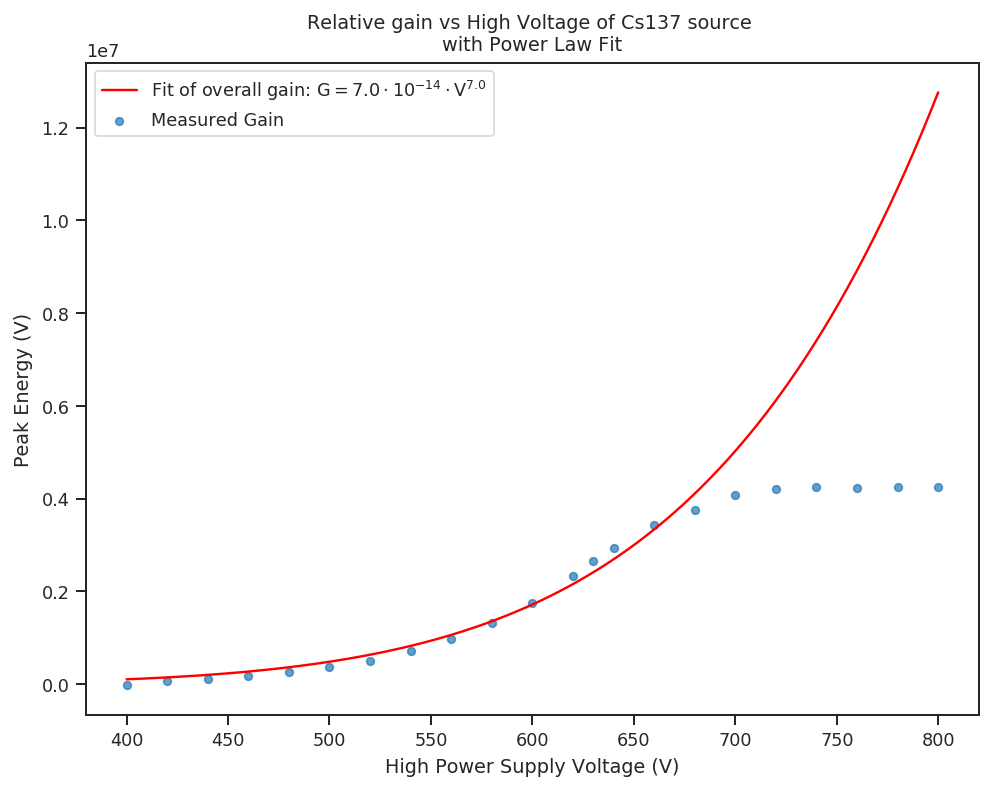

[400.         404.04040404 408.08080808 412.12121212 416.16161616
 420.2020202  424.24242424 428.28282828 432.32323232 436.36363636
 440.4040404  444.44444444 448.48484848 452.52525253 456.56565657
 460.60606061 464.64646465 468.68686869 472.72727273 476.76767677
 480.80808081 484.84848485 488.88888889 492.92929293 496.96969697
 501.01010101 505.05050505 509.09090909 513.13131313 517.17171717
 521.21212121 525.25252525 529.29292929 533.33333333 537.37373737
 541.41414141 545.45454545 549.49494949 553.53535354 557.57575758
 561.61616162 565.65656566 569.6969697  573.73737374 577.77777778
 581.81818182 585.85858586 589.8989899  593.93939394 597.97979798
 602.02020202 606.06060606 610.1010101  614.14141414 618.18181818
 622.22222222 626.26262626 630.3030303  634.34343434 638.38383838
 642.42424242 646.46464646 650.50505051 654.54545455 658.58585859
 662.62626263 666.66666667 670.70707071 674.74747475 678.78787879
 682.82828283 686.86868687 690.90909091 694.94949495 698.98989899
 703.03030

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(high_volts, peak_ch, s=15, label="Measured Gain", marker='o', alpha=0.7)
plt.plot(volts, powers, "r", label= r'Fit of overall gain: $G = 7.0\cdot 10^{-14}\cdot V^{7.0}$')

plt.title("Relative gain vs High Voltage of Cs137 source \nwith Power Law Fit")
plt.xlabel("High Power Supply Voltage (V)")
plt.ylabel("Peak Energy (V)")
plt.legend()
plt.show()

print(volts)
print(peak_ch)